# Data Preprocessing

### Libraray Import

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import r2_score

### Data Import

In [57]:
df=pd.read_csv("E:\\DS Projects\\Project_01_Iris\\Data\\Iris.csv")

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA [Exploratory Data Analysis]

In [62]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [64]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

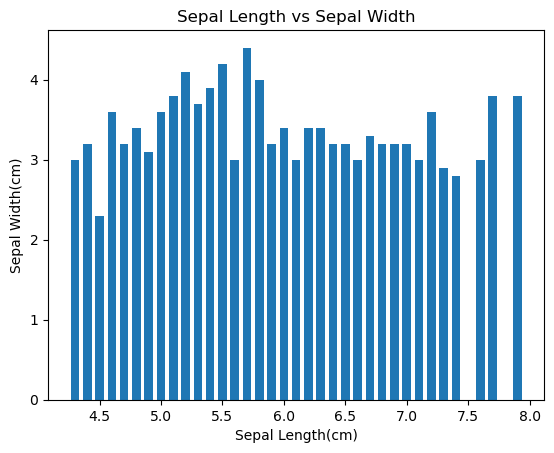

In [65]:
a=df['SepalLengthCm']
b=df['SepalWidthCm']
bar_width=0.07
plt.bar(a,b,width=bar_width)
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

### Feature Engineering

In [67]:
df.replace({"Iris-setosa":1,"Iris-virginica":2,"Iris-versicolor":3},inplace=True)
df

C:\Users\rayya\AppData\Local\Temp\ipykernel_23492\3735480909.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Iris-setosa":1,"Iris-virginica":2,"Iris-versicolor":3},inplace=True)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [68]:
df.drop("Id",axis=1,inplace=True)

In [69]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Data Visualization

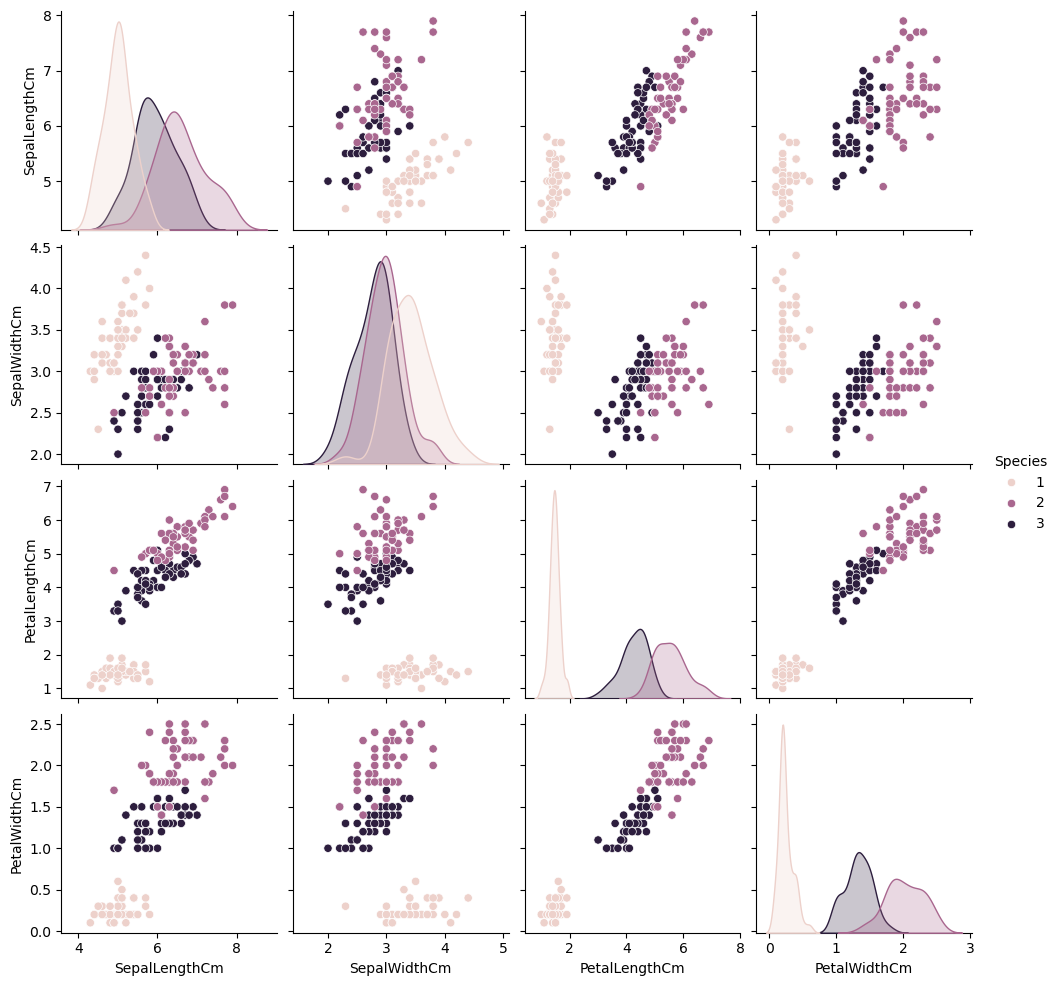

In [71]:
sns.pairplot(df, hue='Species')
plt.show()

### The pairplot provides a visualization of pairwise relationships between different features in the dataset, grouped by the target variable (Species)
### The above visuals show the distribution of each individual feature (like SepalLengthCm, SepalWidthCm, etc.) for each species.
### Setosa typically has a smaller sepal length compared to Versicolor and Virginica.
### Setosa is clearly separable from the other species based on the combination of PetalLengthCm and PetalWidthCm.
### Versicolor and Virginica overlap somewhat but can still be separated based on certain features like petal size. Virginica tends to have longer and wider petals than Versicolor.

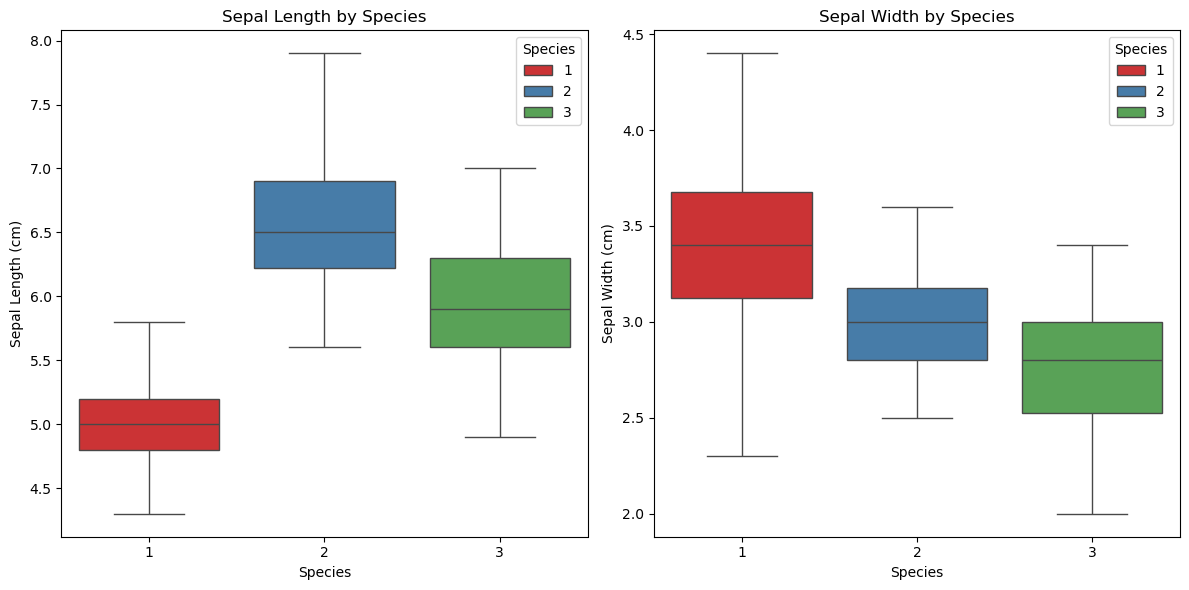

In [72]:
plt.figure(figsize=(12, 6))

# Box plot for Sepal Length
plt.subplot(1, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df, hue='Species', palette='Set1', showfliers=False)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length by Species')

# Box plot for Sepal Width
plt.subplot(1, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df, hue='Species', palette='Set1', showfliers=False)
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Width by Species')

plt.tight_layout()
plt.show()

### The box plots show the distribution of sepal length and width for each species.
### It Reveals the range, median, and quartiles of sepal lengths for each species.
### It Helps to see how sepal length and sepal width varies between different species.

# Model Building

### Train Test Split

In [82]:
X=df[["SepalLengthCm","Species","SepalWidthCm"]]
Y=df["PetalLengthCm"]

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [84]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

105 45 105 45


### Model Initialization

In [86]:
model=LinearRegression()

### Model Training

In [88]:
model.fit(X_train,Y_train)

LinearRegression()

### Hyper Parameter Tuning

# Evaluation and Result

# Errors

## Research